# Обучение без учителя

Машинное обучение без учителям использует алгоритмы машинного обучения для анализа и кластеризации немаркированных(неразмеченных) наборов данных. Т.е. которые заранее не содержат сопоставленных ответов признакам (например длина липестка - 5 и ширина липестка -6 соответствуют виду Ириса - Setosa)как это в машинном обучении с учителем. 

Эти алгоритмы обнаруживают скрытые закономерности или группы данных без вмешательства человека.
Его способность обнаруживать сходства и различия в информации делает его идеальным решением для исследовательского анализа данных, стратегий перекрестных продаж, сегментации клиентов и распознавания изображений.

Такой тип обучения используются для решения трех основных задач - кластеризации, ассоциации и снижения размерности. 

## Решение задачи кластеризации

Кластеризация — способ группировки «похожих» точек данных в кластеры или подгруппы, сохраняя при этом каждую группу как можно более четкой друг от друга. Таким образом, точки данных, принадлежащие разным кластерам, будут сильно отличаться друг от друга. 
Один из алгоритмов, решающих задачу кластеризации является: k-Means.

Для формализации понятия сходства выбирается метрика - расстояние , которая позволяет количественно определить, насколько "близки" друг к другу две точки. Наиболее часто используемой метрикой расстояния является евклидово расстояние (http://statistica.ru/glossary/general/evklidovo-rasstoyanie/). 


Центроид кластера является наиболее репрезентативной особенностью всего кластера. Он является усредненением всех значений точек, входящих в определенную группу.


Алгоритм k-means имеет простую цель: при заданном наборе точек данных он пытается разделить их на k различных кластеров.
Алгоритму необходимо задать изначально значение k, то есть вы должны иметь общее представление о том, сколько кластеров вы ожидаете увидеть в своих данных.

Для начала выводят все точки данных на экран и посмотрят, как выглядят данные на самом деле. Подобная исследовательская визуализация данных может дать примерное представление о том, как следует начинать кластеризовать данные. Помните, что кластеризация - это метод обучения без учителя, поэтому мы никогда не получим идеального ответа на вопрос о том, какие кластеры нам нужны в итоге. Но давайте сделаем все возможное, чтобы полученные результаты были разумными. Под разумностью мы подразумеваем, что наши результаты должны иметь определенную корреляцию с тем, с чем мы ожидаем столкнуться в реальной жизни.

In [1]:
import pandas as pd
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import seaborn as sns

### 1. Сегментация потребителей

In [2]:
df = pd.read_csv("ЛР5/mall-customers-data.csv")

df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.drop(columns=['gender']).corr()

,customer_id,age,annual_income,spending_score
customer_id,1.000000,-0.026763,0.977548,0.013835
age,-0.026763,1.000000,-0.012398,-0.327227
annual_income,0.977548,-0.012398,1.000000,0.009903
spending_score,0.013835,-0.327227,0.009903,1.000000


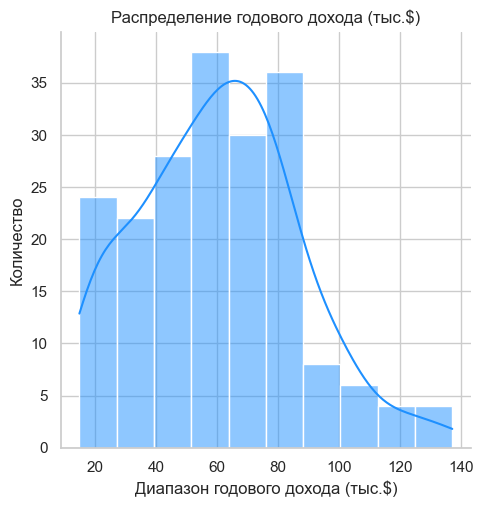

In [4]:
# распределение годового дохода
sns.set(style="whitegrid")
sns.displot(df["annual_income"], kde=True, color="dodgerblue")

plt.title("Распределение годового дохода (тыс.$)")
plt.xlabel("Диапазон годового дохода (тыс.$)")
plt.ylabel("Количество")

plt.show()

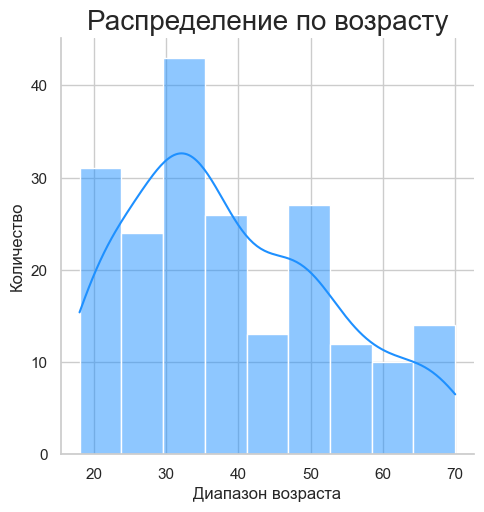

In [5]:
# распределение по возрасту
sns.set(style="whitegrid")
sns.displot(df["age"], kde=True, color="dodgerblue")

plt.title('Распределение по возрасту', fontsize = 20)
plt.xlabel('Диапазон возраста')
plt.ylabel('Количество')

plt.show()

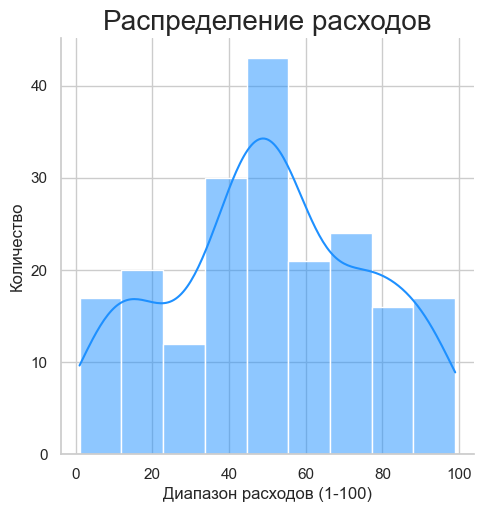

In [6]:
# распределение рейтинга расходов
sns.set(style="whitegrid")
sns.displot(df["spending_score"], kde=True, color="dodgerblue")

plt.title('Распределение расходов', fontsize = 20)
plt.xlabel('Диапазон расходов (1-100)')
plt.ylabel('Количество')

plt.show()

/var/folders/2p/2n_sbc6x70bgqb2n529vjljr0000gp/T/ipykernel_60742/2945696456.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genders.index, y=genders.values, palette=colors)


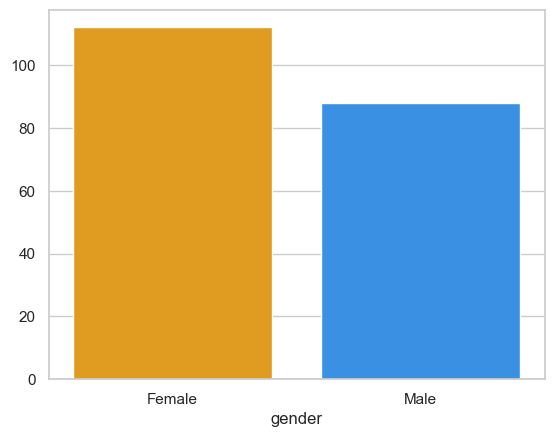

In [7]:
# анализ пола потребителей
genders = df["gender"].value_counts()

colors = {
    "Male": "dodgerblue",
    "Female": "orange"
}

sns.set(style="whitegrid")
sns.barplot(x=genders.index, y=genders.values, palette=colors)

plt.show()

In [8]:
# учет двух характеристик: годовой доход и показатель расходов
X = df[["annual_income", "spending_score"]]
X.head()



,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


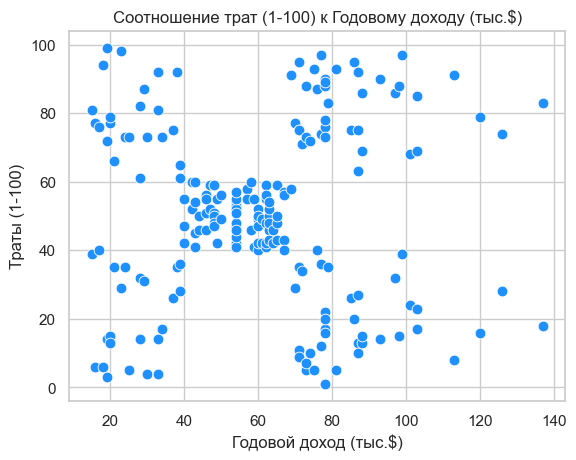

In [9]:
# диаграмма приведенных выше данных
sns.scatterplot(x="annual_income", y="spending_score", data=X, s=60, color="dodgerblue")

plt.xlabel('Годовой доход (тыс.$)')
plt.ylabel('Траты (1-100)')
plt.title('Соотношение трат (1-100) к Годовому доходу (тыс.$)')

plt.show()

Поиск оптимального количества кластеров.

Основополагающим шагом для любого алгоритма обучения без учителя является определение оптимального количества кластеров, на которые могут быть разбиты данные. Поскольку в таких алгоритмах нет заранее заданного числа кластеров, обычно используется какой-либо метод, который помогает определить оптимальное число кластеров. В случае кластеризации K-Means для определения оптимального числа кластеров используется Метод локтя (Elbow method).

В алгоритме кластеризации k-means мы случайным образом инициализируем k кластеров и итеративно корректируем эти k кластеров до тех пор, пока эти k-центроидов не придут в равновесное состояние. Однако главное, что мы делаем перед инициализацией кластеров, - это определяем, сколько кластеров мы должны использовать.

Для определения K (числа кластеров) мы используем метод локтя.  Метод Локтя - это метод, который мы используем для определения количества центроидов (k), используемых в алгоритме кластеризации k-средних.  В этом методе для определения значения k выполняется непрерывный итерационный цикл от k=1 до k=n (здесь n - гиперпараметр, который мы выбираем в соответствии с нашими требованиями). Для каждого значения k мы вычисляем значение внутрикластерной суммы квадратов (WCSS).

График при таком методе имеет вид локтя. Кроме того, при k=1 WCSS имеет наибольшее значение, но с увеличением k значение WCSS начинает уменьшаться. Мы выбираем такое значение k, при котором график начинает выглядеть как прямая линия.


WCSS (within-cluster-sum-of-square) - внутрикластерная сумма квадратов

### Метод локтя

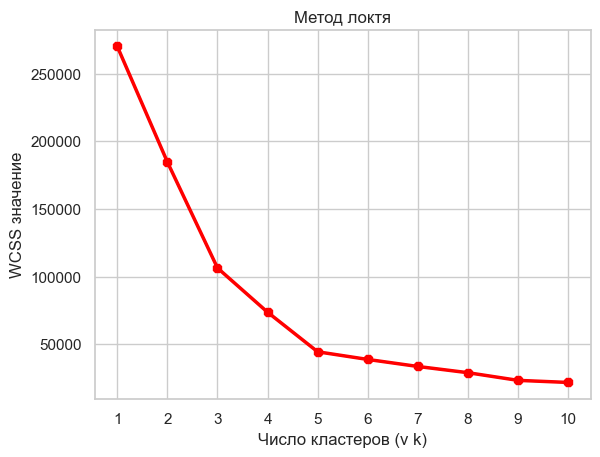

In [10]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X) # обратите внимание, что передается параметр Х
    wcss.append(k_means.inertia_)
    
# график метода локтя
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")

plt.title("Метод локтя")
plt.xlabel("Число кластеров (v k)")
plt.ylabel("WCSS значение")
plt.xticks(np.arange(1, 11, 1))

plt.show()

### Нахождение кластеров

In [11]:
# k = 5
k_means_1 = KMeans(n_clusters=5)

# обучение без учителя на входных данных, обратите внимание целевой искомой переменной Y нет 
k_means_1.fit(X)

# сопоставление по кластерам данных
y_pred = k_means_1.predict(X)

# добавление метки кластера в исходный набор данных для удобства
df["label"] = y_pred

df.head()

,customer_id,gender,age,annual_income,spending_score,label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


### Отображение кластеров

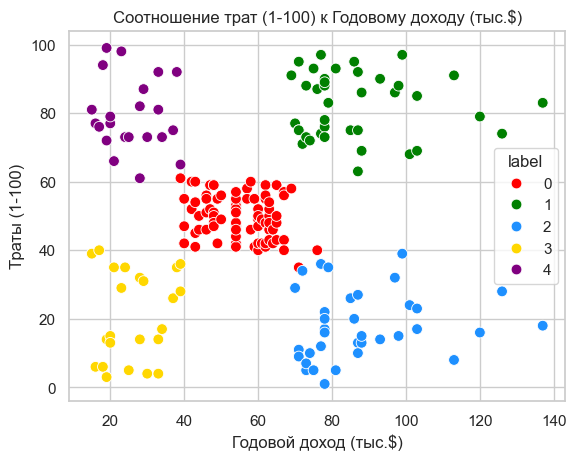

In [12]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]

# отображение кластеров
sns.scatterplot(
    x="annual_income",
    y="spending_score",
    hue="label", 
    palette=colors, 
    legend="full", 
    data=df, 
    s=60
)

plt.xlabel('Годовой доход (тыс.$)')
plt.ylabel('Траты (1-100)') 
plt.title('Соотношение трат (1-100) к Годовому доходу (тыс.$)')
plt.show()

### 2. Самостоятельная работа

In [13]:
# выполните ниже этап "Нахождение кластеров". Для этого задайте параметр k = 4
k_means_2 = KMeans(n_clusters=4)

# обучение без учителя на входных данных, обратите внимание целевой искомой переменной Y нет 
k_means_2.fit(X)

# сопоставление по кластерам данных
y_pred_1 = k_means_2.predict(X)

# добавление метки кластера в исходный набор данных для удобства
df["label_2"] = y_pred_1

df.head()

,customer_id,gender,age,annual_income,spending_score,label,label_2
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,0
2,3,Female,20,16,6,3,3
3,4,Female,23,16,77,4,0
4,5,Female,31,17,40,3,3


/var/folders/2p/2n_sbc6x70bgqb2n529vjljr0000gp/T/ipykernel_60742/1520184756.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(


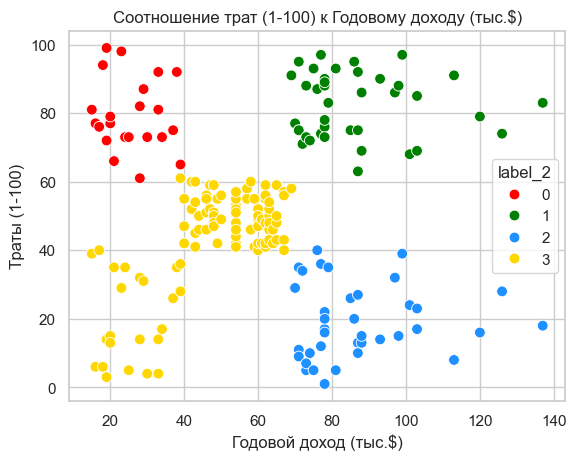

In [14]:
# выполните ниже этап "Отображение кластеров"
colors = ["red", "green", "dodgerblue", "gold", "purple"]

# отображение кластеров
sns.scatterplot(
    x="annual_income",
    y="spending_score",
    hue="label_2", 
    palette=colors, 
    legend="full", 
    data=df, 
    s=60
)

plt.xlabel('Годовой доход (тыс.$)')
plt.ylabel('Траты (1-100)') 
plt.title('Соотношение трат (1-100) к Годовому доходу (тыс.$)')
plt.show()


In [17]:
# выполните ниже этап "Нахождение кластеров". Для этого задайте параметр k = 4
k_means_3 = KMeans(n_clusters=3)

# обучение без учителя на входных данных, обратите внимание целевой искомой переменной Y нет 
k_means_3.fit(X)

# сопоставление по кластерам данных
y_pred_3 = k_means_3.predict(X)


# добавление метки кластера в исходный набор данных для удобства
df["label_3"] = y_pred_3

df.head()

,customer_id,gender,age,annual_income,spending_score,label,label_2,label_3
0,1,Male,19,15,39,3,3,0
1,2,Male,21,15,81,4,0,0
2,3,Female,20,16,6,3,3,0
3,4,Female,23,16,77,4,0,0
4,5,Female,31,17,40,3,3,0


/var/folders/2p/2n_sbc6x70bgqb2n529vjljr0000gp/T/ipykernel_60742/3985221132.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(


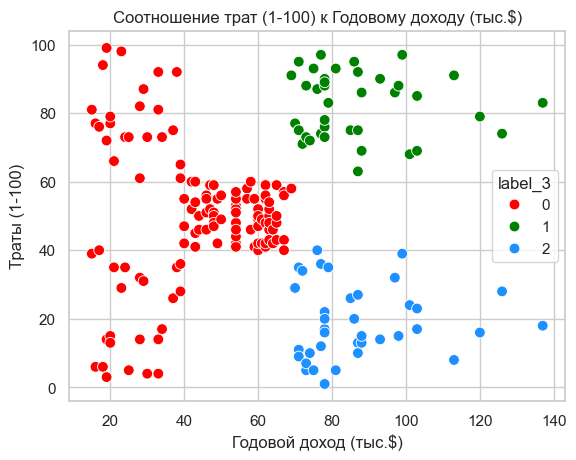

In [18]:
# выполните ниже этап "Отображение кластеров"
colors = ["red", "green", "dodgerblue", "gold", "purple"]

# отображение кластеров
sns.scatterplot(
    x="annual_income",
    y="spending_score",
    hue="label_3", 
    palette=colors, 
    legend="full", 
    data=df, 
    s=60
)

plt.xlabel('Годовой доход (тыс.$)')
plt.ylabel('Траты (1-100)') 
plt.title('Соотношение трат (1-100) к Годовому доходу (тыс.$)')
plt.show()


### 3. Самостоятельная работа

Как можно применить задачу кластеризации для набора данных Ирис (https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv)

In [15]:
df_iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df_iris = df_iris.drop('species', axis=1)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# выполните ниже этап "Нахождение кластеров". 
# число кластеров = 3  Для этого задайте параметр k = 3, вместо Х в k_means.fit(X) подставьте df_iris

clusterNum = 3 #сюда после равно запишите число кластеров
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)

# обучение
k_means.fit(df_iris)

labels_iris = k_means.labels_
print(labels_iris)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
